In [1]:
options(browser="firefox")
library(microViz)
library(ggplot2)
library(phyloseq)
library('reshape2')
library('dplyr')
library('plyr')
library('vegan')
library("microbiome")

microViz version 0.12.1 - Copyright (C) 2021-2024 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For citation details, run: `citation("microViz")`
✖ Silence? `suppressPackageStartupMessages(library(microViz))`

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: permute

Loading requ

In [2]:
tax <- "/home/fchaaban/asterix/scratch/hdd2/farid/2024_MeSS/tests/bench/lineage.tsv"
otu <- "/home/fchaaban/asterix/scratch/hdd2/farid/2024_MeSS/tests/bench/otus/otus.tsv"
meta <- "/home/fchaaban/asterix/scratch/hdd2/farid/2024_MeSS/tests/bench/tool_comp_meta.tsv"

In [3]:
meta_df <- read.csv(meta, sep = "\t")
rownames(meta_df) <- meta_df$file

In [4]:
meta_df

,file,sample,origin,body_site,simulated
,<chr>,<chr>,<chr>,<chr>,<chr>
SRS013506,SRS013506,SRS013506,gold_standard,buccal mucosa,False
SRS050029,SRS050029,SRS050029,gold_standard,buccal mucosa,False
SRS1041031,SRS1041031,SRS1041031,gold_standard,feces,False
SRS014689,SRS014689,SRS014689,gold_standard,throat,False
SRS065335,SRS065335,SRS065335,gold_standard,throat,False
SRS104912,SRS104912,SRS104912,gold_standard,feces,False
SRS054569,SRS054569,SRS054569,gold_standard,buccal mucosa,False
SRS146847,SRS146847,SRS146847,gold_standard,vagina,False
SRS142957,SRS142957,SRS142957,gold_standard,vagina,False


In [5]:
tax_df <- read.csv(tax, sep = "\t")
rownames(tax_df) <- tax_df$taxonomy_id
tax_df <- subset(tax_df, select=-c(taxonomy_id))
head(tax_df)

,kindom,phylum,class,order,family,genus,species
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7,Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,Xanthobacteraceae,Azorhizobium,Azorhizobium caulinodans
9,Bacteria,Pseudomonadota,Gammaproteobacteria,Enterobacterales,Erwiniaceae,Buchnera,Buchnera aphidicola
11,Bacteria,Actinomycetota,Actinomycetes,Micrococcales,Cellulomonadaceae,Cellulomonas,Cellulomonas gilvus
14,Bacteria,Dictyoglomota,Dictyoglomia,Dictyoglomales,Dictyoglomaceae,Dictyoglomus,Dictyoglomus thermophilum
19,Bacteria,Thermodesulfobacteriota,Desulfuromonadia,Desulfuromonadales,Syntrophotaleaceae,Syntrophotalea,Syntrophotalea carbinolica
24,Bacteria,Pseudomonadota,Gammaproteobacteria,Alteromonadales,Shewanellaceae,Shewanella,Shewanella putrefaciens


In [6]:
otu_df <- read.csv(otu, sep = "\t")
rownames(otu_df) <- otu_df$taxonomy_id
otu_df<- subset(otu_df, select=-c(taxonomy_id))
head(otu_df)

,SRS013506,SRS013506_filtered,SRS014475,SRS014475_filtered,SRS014689,SRS014689_filtered,SRS019352,SRS019352_filtered,SRS050029,SRS050029_filtered,⋯,mess_SRS1041031,mess_SRS1041129,mess_SRS104912,mess_SRS105082,mess_SRS142957,mess_SRS143032,mess_SRS143776,mess_SRS144378,mess_SRS146847,mess_SRS147088
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
7,0,0,0,0,0,0,0,0,35,0,⋯,0,0,0,0,0,0,0,0,0,0
9,129,0,6,0,119,0,5,0,22,0,⋯,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,7,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
14,10,0,0,0,7,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
19,0,0,3,0,6,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
24,68,0,0,0,42,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
OTU <- otu_table(otu_df, taxa_are_rows = T) 

In [8]:
TAX <- tax_table(tax_df)
colnames(TAX) <- colnames(tax_df)
rownames(TAX) <- rownames(tax_df)

Warning message in .local(object):
“Coercing from data.frame class to character matrix 
prior to building taxonomyTable. 
This could introduce artifacts. 
Check your taxonomyTable, or coerce to matrix manually.”


In [9]:
richdf <- data.frame(specnumber(t(OTU))) %>% rename_at('specnumber.t.OTU..', ~'richness')

In [10]:
sam <- merge(meta_df,richdf, by="row.names") %>% arrange(sample) %>% select(! 'Row.names')
SAM <- sample_data(sam)

In [11]:
rownames(SAM) <- SAM$file

In [12]:
SAM$origin <- factor(SAM$origin, levels=c("gold_standard","gs_filtered","camisim","mess"))
SAM$simulated <- factor(SAM$simulated, levels=c("False","True"))
SAM$body_site <- factor(SAM$body_site, levels=unique(SAM$body_site))

In [13]:
ps <- phyloseq(OTU, TAX, SAM)

In [14]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9922 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 9922 taxa by 7 taxonomic ranks ]

In [32]:
#ord_explore(ps)

In [33]:
set.seed(1) 
dist = "bray"
method = "NMDS"
trans = "identity"
rank <- "species"
mdist <- ps %>%
 tax_transform(rank = rank, trans = trans) %>%
 dist_calc(dist = dist) 

In [34]:
ord <- 
 ord_calc(mdist,
  method = method
 )

Run 0 stress 0.175226 
Run 1 stress 0.2317832 
Run 2 stress 0.1772649 
Run 3 stress 0.4072401 
Run 4 stress 0.17531 
... Procrustes: rmse 0.003406818  max resid 0.01046272 
Run 5 stress 0.2024248 
Run 6 stress 0.224065 
Run 7 stress 0.2491055 
Run 8 stress 0.2478874 
Run 9 stress 0.1755123 
... Procrustes: rmse 0.01124492  max resid 0.03489262 
Run 10 stress 0.1637028 
... New best solution
... Procrustes: rmse 0.03417444  max resid 0.1072188 
Run 11 stress 0.1978185 
Run 12 stress 0.1772767 
Run 13 stress 0.1637028 
... Procrustes: rmse 4.138686e-05  max resid 0.0002745528 
... Similar to previous best
Run 14 stress 0.2000735 
Run 15 stress 0.1770846 
Run 16 stress 0.1637028 
... New best solution
... Procrustes: rmse 9.107159e-05  max resid 0.0005382943 
... Similar to previous best
Run 17 stress 0.1637028 
... Procrustes: rmse 9.240586e-05  max resid 0.0005028931 
... Similar to previous best
Run 18 stress 0.1772488 
Run 19 stress 0.1753582 
Run 20 stress 0.1637731 
... Procrustes: 

In [35]:
stress <-ord_get(ord)$stress
stress

[1] 0.1637028

## NMDS

## Bray

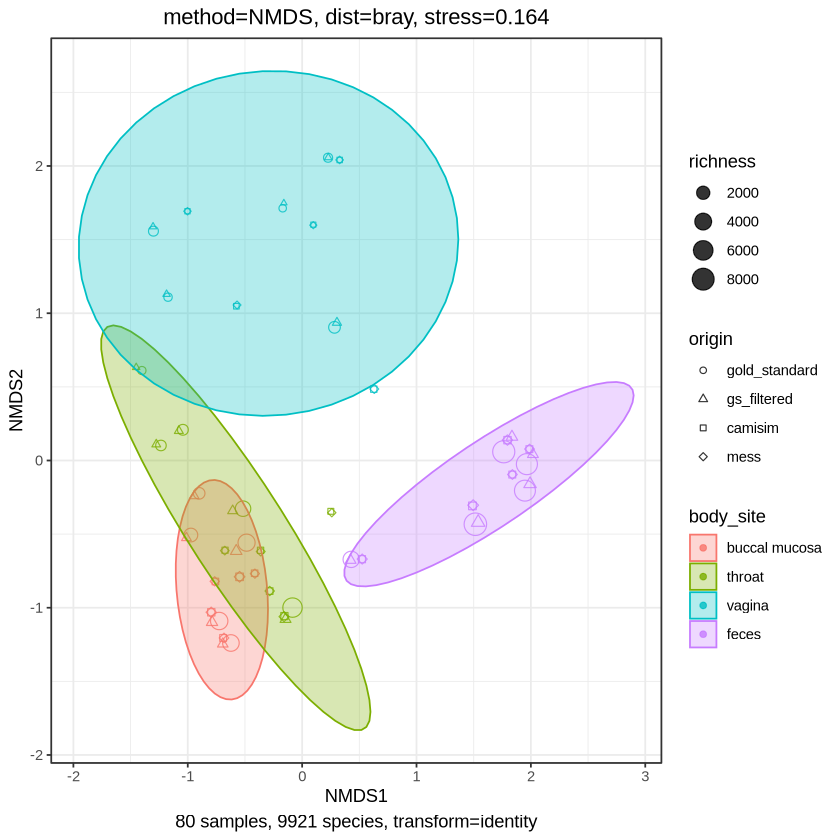

In [36]:
p <- ord_plot(ord,
axes = c(1, 2),
auto_caption = NA,
colour = "body_site",
shape = "origin", alpha = 0.8,
size = "richness"
) + 
scale_shape_girafe_filled() +
stat_ellipse(geom = "polygon",aes(group = body_site, color = body_site, fill= body_site), alpha=0.3) +
theme_bw() +
ggtitle(sprintf("method=%s, dist=%s, stress=%s",method, dist,format(stress, digit=3))) +
labs(caption = sprintf("80 samples, 9921 species, transform=%s",trans)) +
theme(plot.caption = element_text(size = 11,hjust=0.5), plot.title = element_text(hjust=0.5))
p

In [27]:
ggsave(sprintf("%s-%s-%s.svg",rank,dist,method),p, dpi = 400, units = "in")

Saving 6.67 x 6.67 in image


## Jaccard

In [28]:
dist = "jaccard"
method = "NMDS"
trans = "binary"
rank <- "species"
mdist <- ps %>%
 tax_transform(rank = rank, trans = trans) %>%
 dist_calc(dist = dist) 
ord <- 
 ord_calc(mdist,
  method = method
 )

Run 0 stress 0.1404018 
Run 1 stress 0.1400976 
... New best solution
... Procrustes: rmse 0.06881189  max resid 0.1743239 
Run 2 stress 0.1358727 
... New best solution
... Procrustes: rmse 0.06591674  max resid 0.1791861 
Run 3 stress 0.1537843 
Run 4 stress 0.1333488 
... New best solution
... Procrustes: rmse 0.06179599  max resid 0.1369804 
Run 5 stress 0.1498844 
Run 6 stress 0.1400975 
Run 7 stress 0.1404018 
Run 8 stress 0.1404018 
Run 9 stress 0.1537843 
Run 10 stress 0.1358374 
Run 11 stress 0.1358374 
Run 12 stress 0.1400914 
Run 13 stress 0.1404023 
Run 14 stress 0.1333488 
... New best solution
... Procrustes: rmse 3.491273e-05  max resid 0.0001417233 
... Similar to previous best
Run 15 stress 0.1333488 
... Procrustes: rmse 1.759431e-05  max resid 7.762212e-05 
... Similar to previous best
Run 16 stress 0.1400984 
Run 17 stress 0.1358378 
Run 18 stress 0.1333488 
... Procrustes: rmse 2.528746e-05  max resid 0.0001085599 
... Similar to previous best
Run 19 stress 0.13334

In [25]:
stress <-ord_get(ord)$stress
stress

[1] 0.1333488

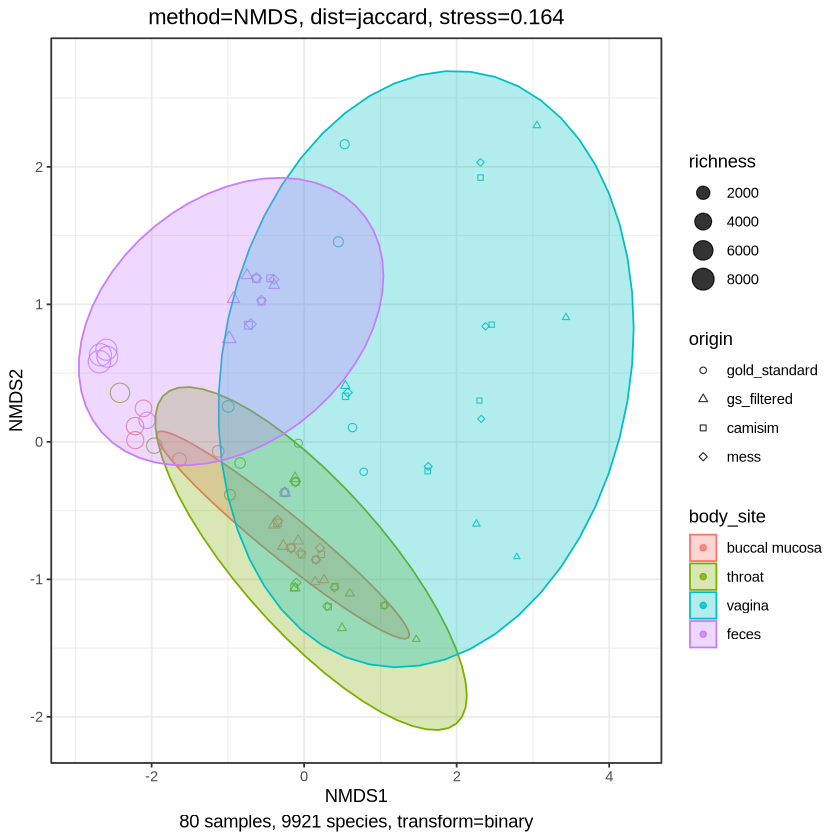

In [29]:
p <- ord_plot(ord,
axes = c(1, 2),
auto_caption = NA,
colour = "body_site",
shape = "origin", alpha = 0.8,
size = "richness"
) + 
scale_shape_girafe_filled() +
stat_ellipse(geom = "polygon",aes(group = body_site, color = body_site, fill= body_site), alpha=0.3) +
theme_bw() +
ggtitle(sprintf("method=%s, dist=%s, stress=%s",method, dist,format(stress, digit=3))) +
labs(caption = sprintf("80 samples, 9921 species, transform=%s",trans)) +
theme(plot.caption = element_text(size = 11,hjust=0.5), plot.title = element_text(hjust=0.5))
p

In [30]:
ggsave(sprintf("%s-%s-%s.svg",rank,dist,method),p, dpi = 400, units = "in")

Saving 6.67 x 6.67 in image


In [51]:
help(dist_permanova)

dist_permanova {microViz},R Documentation
data,psExtra output from dist_calc()
variables,"character vector of variables to include in model or character representation of the right-hand side of a formula, e.g ""varA + varB + varA:varB"""
interactions,"optional argument to define any interactions between variables, written in the style of e.g. ""var_a * var_b"""
complete_cases,"if TRUE, drops observations if they contain missing values (otherwise stops if missings are detected)"
n_processes,how many parallel processes to use? (on windows this uses parallel::makePSOCKcluster())
n_perms,how many permutations? e.g. 9999. Less is faster but more is better!
seed,set a random number generator seed to ensure you get the same results each run
by,"passed to vegan::adonis2() by argument: what type of sums of squares to calculate? ""margin"" or ""terms"""
verbose,sends messages about progress if TRUE
...,"additional arguments are passed directly to vegan::adonis2() (e.g. strata, add, sqrt.dist etc.)"


## PERMANOVA

In [37]:
perm <- dist_permanova(mdist,
    variables = "origin:simulated+body_site",
    n_perms = 999, 
    n_processes = 3
)
perm

2024-04-30 10:30:06.868516 - Starting PERMANOVA with 999 perms with 3 processes

2024-04-30 10:30:07.0902 - Finished PERMANOVA



psExtra object - a phyloseq object with extra slots:

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9921 taxa and 80 samples ]
sample_data() Sample Data:       [ 80 samples by 6 sample variables ]
tax_table()   Taxonomy Table:    [ 9921 taxa by 7 taxonomic ranks ]

psExtra info:
tax_agg = "species" tax_trans = "identity" 

bray distance matrix of size 80 
0.01053392 0.8938629 0.8974337 0.880977 0.8886395 ...

permanova:
Permutation test for adonis under reduced model
Marginal effects of terms
Permutation: free
Number of permutations: 999

vegan::adonis2(formula = formula, data = metadata, permutations = n_perms, by = by, parallel = parall)
                 Df SumOfSqs      R2       F Pr(>F)    
body_site         3   12.153 0.37843 15.6933  0.001 ***
origin:simulated  3    1.117 0.03479  1.4429  0.067 .  
Residual         73   18.844 0.58678                   
Total            79   32.115 1.00000                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

In [55]:
help('betadisper', package = 'vegan')

betadisper {vegan},R Documentation
d,"a distance structure such as that returned by dist, betadiver or vegdist."
group,"vector describing the group structure, usually a factor or an object that can be coerced to a factor using as.factor. Can consist of a factor with a single level (i.e., one group)."
type,the type of analysis to perform. Use the spatial median or the group centroid? The spatial median is now the default.
bias.adjust,logical: adjust for small sample bias in beta diversity estimates?
sqrt.dist,Take square root of dissimilarities. This often euclidifies dissimilarities.
add,"Add a constant to the non-diagonal dissimilarities such that all eigenvalues are non-negative in the underlying Principal Co-ordinates Analysis (see wcmdscale for details). Choice ""lingoes"" (or TRUE) use the recommended method of Legendre & Anderson (1999: “method 1”) and ""cailliez"" uses their “method 2”."
display,"character; partial match to access scores for ""sites"" or ""species""."
"object, x","an object of class ""betadisper"", the result of a call to betadisper."
"choices, axes",the principal coordinate axes wanted.
hull,logical; should the convex hull for each group be plotted?


## Beta dispersion

In [52]:
bd <- dist_bdisp(mdist, variables = c("origin","simulated","body_site")) %>%  bdisp_get()
bd

ERROR: Error in dist_bdisp(mdist, variables = c("origin", "simulated", "body_site"), : unused argument (interactions = "origin:simulated")


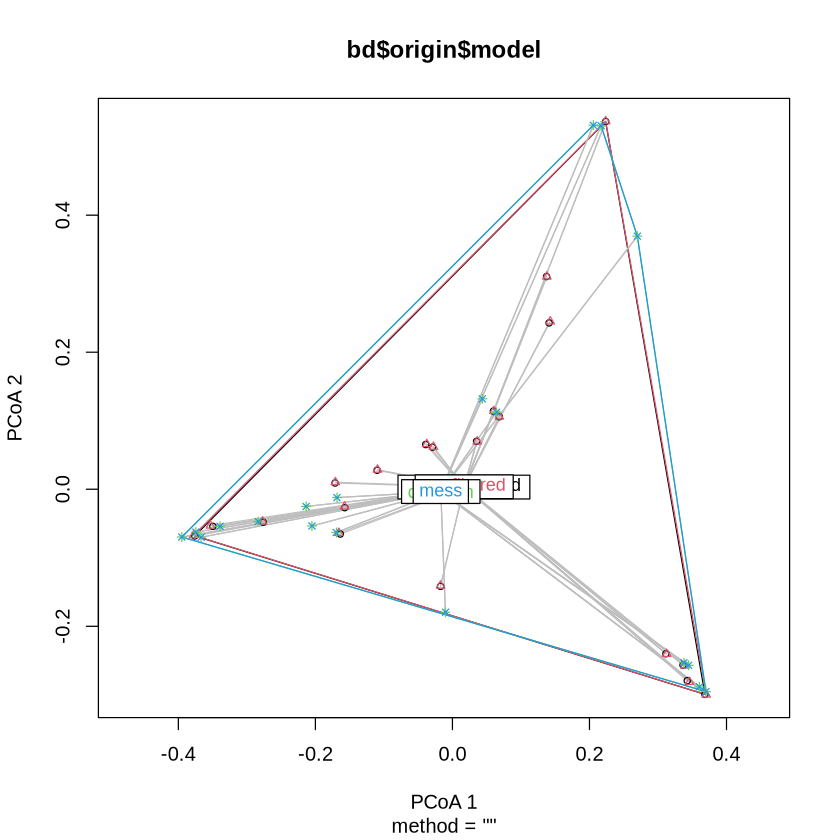

In [150]:
plot(bd$origin$model, label.cex = 0.9)

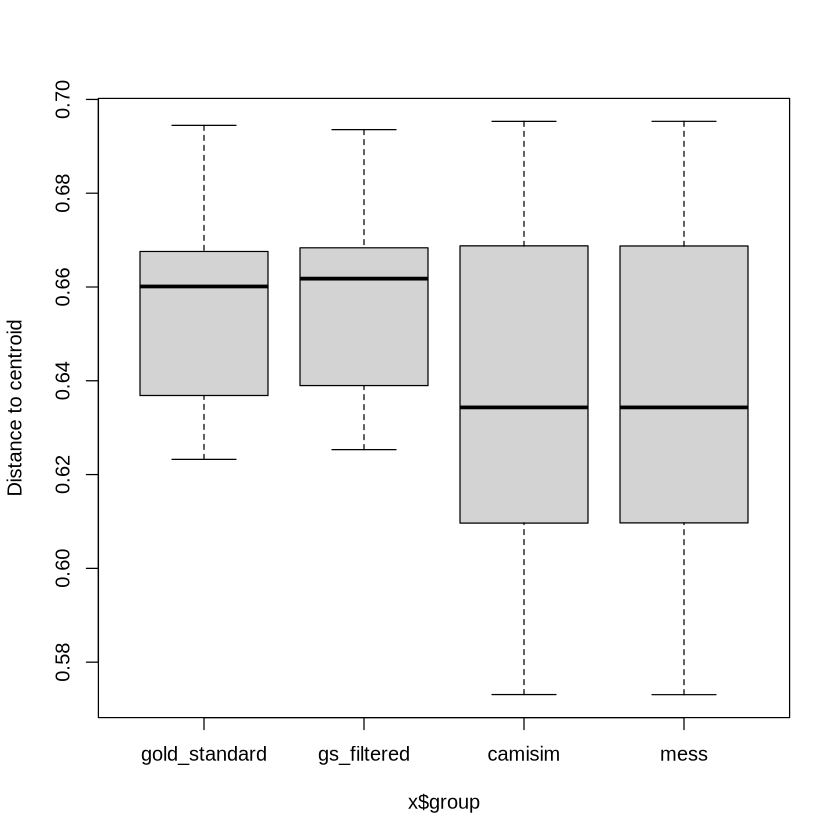

In [151]:
boxplot(bd$origin$model)

## Alpha diversities

In [124]:
alphadiv <- estimate_richness(ps, measures = c("Observed","Chao1","Shannon","Simpson",'InvSimpson'))
alphadiv$file <- rownames(alphadiv)

Warning message in estimate_richness(ps, measures = c("Observed", "Chao1", "Shannon", :
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


In [125]:
alphadiv <- inner_join(alphadiv, SAM, by="file") # add sample metadata

In [126]:
alphadiv <- subset(alphadiv, select = -c(richness,se.chao1,file))

In [127]:
head(alphadiv)

,Observed,Chao1,Shannon,Simpson,InvSimpson,sample,origin,body_site,simulated
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>
1,4168,4168,3.471800,0.9091176,11.003227,SRS013506,gold_standard,buccal mucosa,False
2,413,413,3.277977,0.9052065,10.549245,SRS013506,gs_filtered,buccal mucosa,False
3,926,926,2.776731,0.8044688,5.114272,SRS014475,gold_standard,throat,False
4,107,107,2.572267,0.7939005,4.852026,SRS014475,gs_filtered,throat,False
5,5816,5816,3.778542,0.9547760,22.112145,SRS014689,gold_standard,throat,False
6,323,323,3.608623,0.9531086,21.325884,SRS014689,gs_filtered,throat,False


In [128]:
alphadiv <- melt(alphadiv)

Using sample, origin, body_site, simulated as id variables



In [129]:
head(alphadiv)

,sample,origin,body_site,simulated,variable,value
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,SRS013506,gold_standard,buccal mucosa,False,Observed,4168
2,SRS013506,gs_filtered,buccal mucosa,False,Observed,413
3,SRS014475,gold_standard,throat,False,Observed,926
4,SRS014475,gs_filtered,throat,False,Observed,107
5,SRS014689,gold_standard,throat,False,Observed,5816
6,SRS014689,gs_filtered,throat,False,Observed,323


In [130]:
names(alphadiv) <- c("sample","origin","bodysite", "simulated","alpha","value")

In [131]:
head(alphadiv)

,sample,origin,bodysite,simulated,alpha,value
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,SRS013506,gold_standard,buccal mucosa,False,Observed,4168
2,SRS013506,gs_filtered,buccal mucosa,False,Observed,413
3,SRS014475,gold_standard,throat,False,Observed,926
4,SRS014475,gs_filtered,throat,False,Observed,107
5,SRS014689,gold_standard,throat,False,Observed,5816
6,SRS014689,gs_filtered,throat,False,Observed,323


`geom_smooth()` using formula = 'y ~ x'


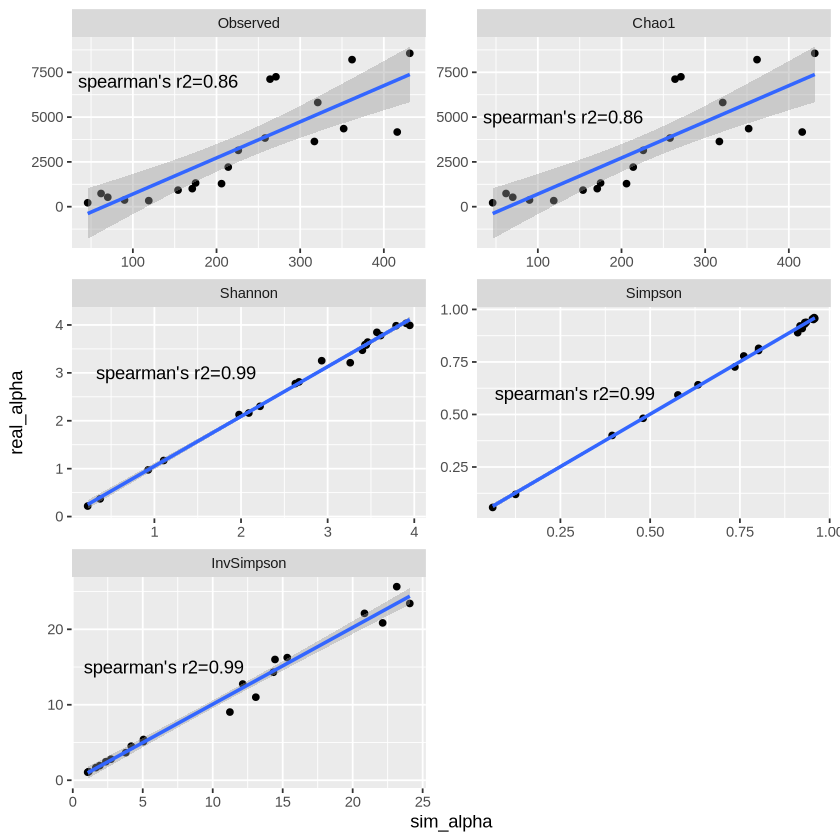

In [141]:
sim_alpha <- subset(alphadiv,origin=='mess')
names(sim_alpha)[names((sim_alpha))=='value']='sim_alpha'
real_alpha <- subset(alphadiv,origin=='gold_standard')
names(real_alpha)[names((real_alpha))=='value']='real_alpha'
df=cbind(real_alpha,sim_alpha)
df=subset(df, select=which(!duplicated(names(df)))) 
r <- 'spearman'
cor=round(cor(df$sim_alpha, df$real_alpha, method = r), 3)
cors <- ddply(df, c("alpha"), summarise, cor=round(cor(real_alpha, sim_alpha,method=r), 5))
cors$x=c(130,130,1.25,0.29,6.5)
cors$y=c(7000,5000,3,0.6,15)
cors$r2=round(cors$cor^2,2)
#png(sprintf('%s/alpha-div-cor.png', outpath),res=500,units = 'in',height = 6, width = 10)
c <- ggplot(df,aes(x=sim_alpha,y=real_alpha))+geom_point()
c <- c+facet_wrap(~alpha,scales='free',ncol = 2)+geom_smooth(method = "lm", se = TRUE)
c + geom_text(data=cors, aes(x=x,y=y,label=paste(r,"'s ","r2=", r2, sep="")))